In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large
Z_{n+1} = Z_{n}^{-(((p_{1}^{Z_{n})^{p_{2})^{Z_{n})^{p_{3}}}}}}
\end{eqnarray}""")

<IPython.core.display.Latex object>

# Graphical analysis of a numerical oddity.

    Sequential iteration on the complex plane of difference equation:
    Z = Z^(-(((p[0]^Z)^p[1])^Z)^p[2])
    with parameter set:
    p= [-0.029066089625696265+0.030556496865847337j,
        -0.84042726201488649, 
        0.013147051704933837+0.012053822775137061j]
    suggests an organic figure.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [3]:
def swanfishsnail(Z, p, Z0=None, ET=None):
    """ Z = bugga_bear(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
        Z = Z.^(-exp(pi * p(2)).^Z.^(-sin(abs(p(1) + p(2)))).^Z.^(exp(p(2)-p(1))));
    """
    return Z**(-(((p[0]**Z)**p[1])**Z)**p[2])

In [4]:
#                                        -- define parameters iterate the above equation  --
par_set = {'n_rows': 500, 'n_cols': 700}
par_set['center_point'] = 0.2 - 0.55j
par_set['theta'] = -np.pi/4
par_set['zoom'] = 0.5

par_set['it_max'] = 100
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

p = [3.01874673, -1.00776339+0.74204475j]
p0 = np.exp(np.pi * p[1])
p1 = -np.sin(np.abs(p[0] + p[1]))
p2 = np.exp(p[1] - p[0])

list_tuple = [(swanfishsnail, ([p0, p1, p2]))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

32.77852702140808 	 total time
converstion time =	 0.9363350868225098


coloring time =	 2.1444571018218994


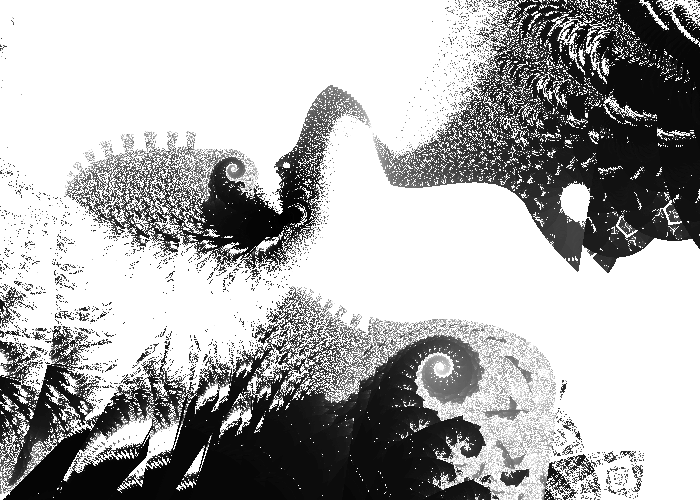

In [5]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 2.0775160789489746


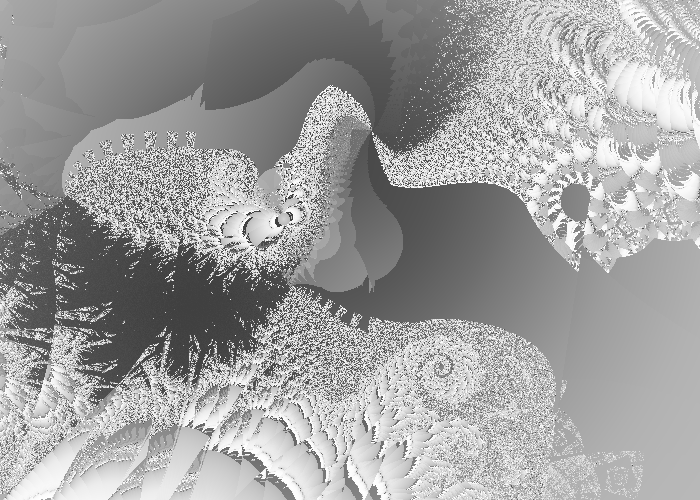

In [6]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 2.0953400135040283


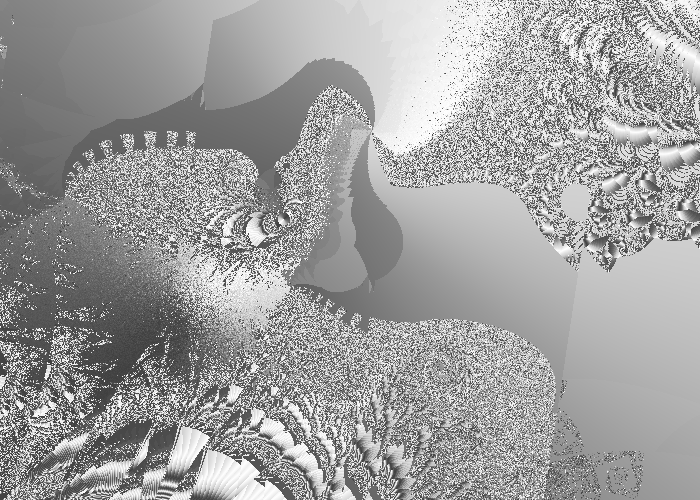

In [7]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 4.534630060195923


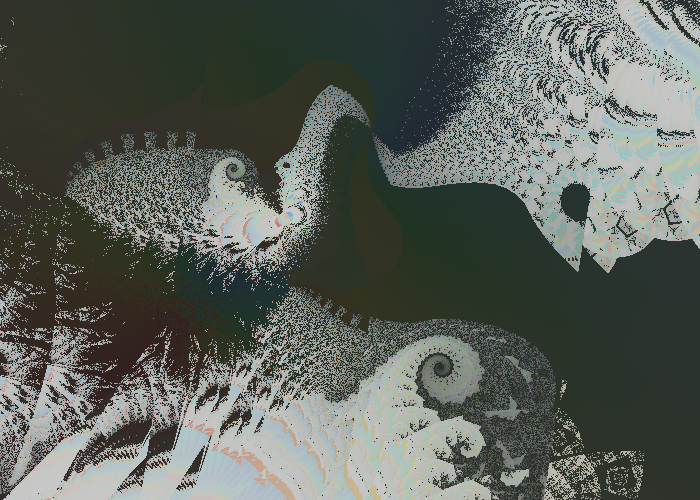

In [8]:
H = ncp.range_norm(Zr, lo=0.0, hi=0.6)
S = ncp.range_norm(1 - Zd, lo=0.0, hi=0.4)
V = ncp.range_norm(1 - ETn, lo=0.2, hi=0.8)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

In [10]:
#                                        smaller -> view individual escape time sets
par_set = {'n_rows': 150, 'n_cols': 250}
par_set['center_point'] = 0.2 - 0.55j
par_set['theta'] = -np.pi/4
par_set['zoom'] = 0.5

par_set['it_max'] = 512
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

p = [3.01874673, -1.00776339+0.74204475j]
p0 = np.exp(np.pi * p[1])
p1 = -np.sin(np.abs(p[0] + p[1]))
p2 = np.exp(p[1] - p[0])

list_tuple = [(swanfishsnail, ([p0, p1, p2]))]

t0 = time.time()
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

15.527271032333374 	 total time


ET =	 1


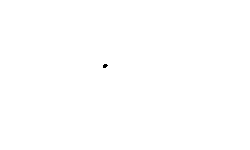

ET =	 2


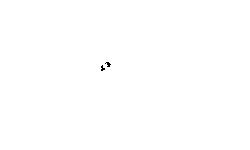

ET =	 3


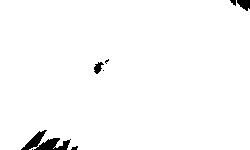

ET =	 4


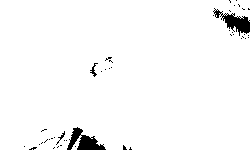

ET =	 5


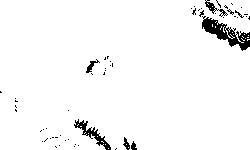

ET =	 6


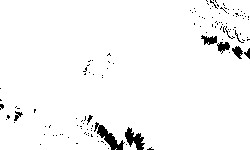

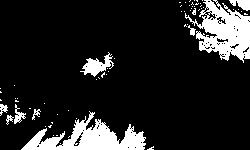

In [11]:
#                                        view smaller - individual escape time starting points
for t in range(1,7):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > 7] = 0
display(ncp.mat_to_gray(I))

In [12]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>', (ET_sm > k).sum())

0 0
1 15
2 30
3 663
4 1007
5 1314
6 1191
7 951
8 946
9 607
10 669
11 420
12 563
13 342
14 463
15 295
16 358
17 223
18 301
19 210
20 231
21 173
22 213
23 165
24 177
25 134
26 153
27 130
28 140
29 97
30 106
31 86
32 102
33 57
34 81
35 55
36 103
37 63
38 85
39 58
40 86
41 59
42 70
43 50
44 70
45 52
46 70
47 36
48 60
49 72
50 61
51 40
52 60
53 52
54 57
55 45
56 43
57 35
58 38
59 32
60 45
61 47
62 43
63 35
64 34
65 49
66 40
67 38
68 50
69 41
70 56
71 46
72 48
73 34
74 41
75 36
76 39
77 35
78 54
79 41
80 30
81 26
82 29
83 25
84 37
85 16
86 29
87 28
88 30
89 21
90 22
91 13
92 18
93 14
94 16
95 11
96 13
97 13
98 16
99 12
100 11
101 9
102 13
103 7
104 7
105 6
106 10
107 9
108 9
109 8
110 2
111 5
112 6
113 4
114 3
115 4
116 2
117 3
118 4
119 6
120 8
121 4
122 5
123 3
124 5
125 3
126 6
127 4
128 5
129 5
130 5
131 4
132 2
133 6
134 4
135 4
136 4
137 3
138 3
139 1
140 0
141 1
142 1
143 3
144 4
145 1
146 1
147 3
148 0
149 1
150 3
151 0
152 3
153 0
154 0
155 1
156 1
157 1
158 3
159 1
160 0
161 1
162 

In [13]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  2.87 97.3 degrees

    21860 total unescaped points

   points near V       (plane units)
    21860 within V/ 1  (2.868)
    15223 within V/ 2  (1.434)
     8824 within V/ 3  (0.956)
     5480 within V/ 4  (0.717)
     3790 within V/ 5  (0.574)
     2676 within V/ 6  (0.478)
     1965 within V/ 7  (0.410)
     1492 within V/ 8  (0.358)
     1179 within V/ 9  (0.319)
      956 within V/10  (0.287)
      792 within V/11  (0.261)
